# Import libraries

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create Dataset

In [2]:
n_samples = 100

X = np.int64(np.random.uniform(50, 250, n_samples))

true_slope = 3000
true_intercept = 50000

Y_true = true_slope * X + true_intercept

std_noise = 0.1 * np.mean(Y_true)
noise = np.random.normal(0, std_noise, n_samples)

Y = Y_true + noise

data = pd.DataFrame({"area": X, "price": Y})

In [3]:
data.head()

,area,price
0,85,345612.071976
1,156,511584.354448
2,139,450515.399273
3,245,689828.934266
4,204,643425.323297


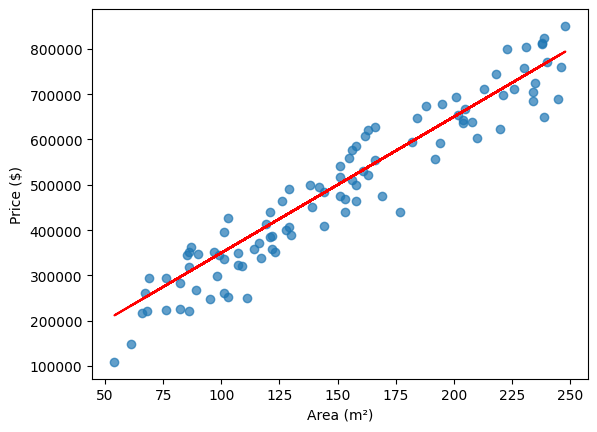

In [4]:
plt.scatter(X, Y, alpha=0.7)
plt.plot(X, true_slope * X + true_intercept, "r")
plt.xlabel("Area (m²)")
plt.ylabel("Price ($)")
plt.show()

# Linear Regression

$$Linear\ Regression\ with\ one\ variable$$
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$
$$Goal:\ Calculate\ best\ values\ for\ \theta \ parameters$$
$$Minimize\ losses$$
$$Cost\ function\ (MSE):\ J = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{i}) - y^{i})^2$$
$$Algorithm\ for\ find\ parameters:\ Gradient\ Descent$$

$$\theta(t + 1) = \theta(t) + \Delta{\theta}\ \ \rightarrow \ \ \Delta{\theta} = -\alpha \frac{\partial{J}}{\partial{\theta}}$$

$$\theta(t + 1) = \theta(t) - \alpha \frac{\partial{J}}{\partial{\theta}}$$

$$J = \frac{1}{2m} \sum_{i=1}^{m}(\theta_{0} + \theta_{1}x^{i} - y^{i})^2$$

$$\theta_{0}(t + 1) = \theta_{0}(t) - \alpha \frac{\partial{J}}{\partial{\theta_{0}}}\ \ \rightarrow \ \ 
\frac{\partial{J}}{\partial{\theta_{0}}} = \frac{1}{m} \sum_{i=1}^{m}(\theta_{0} + \theta_{1}x^{i} - y^{i})\ \ \rightarrow \ \ 
\theta_{0}(t + 1) = \theta_{0}(t) - \frac{\alpha}{m} \sum_{i=1}^{m}(\theta_{0} + \theta_{1}x^{i} - y^{i})$$

$$\theta_{1}(t + 1) = \theta_{1}(t) - \alpha \frac{\partial{J}}{\partial{\theta_{1}}}\ \ \rightarrow \ \ 
\frac{\partial{J}}{\partial{\theta_{1}}} = \frac{1}{m} \sum_{i=1}^{m}(\theta_{0} + \theta_{1}x^{i} - y^{i})x^{i}\ \ \rightarrow \ \ 
\theta_{1}(t + 1) = \theta_{1}(t) - \frac{\alpha}{m} \sum_{i=1}^{m}(\theta_{0} + \theta_{1}x^{i} - y^{i})x^{i}$$


## Batch Gradient Descent

In [5]:
data.sample(5)

,area,price
29,130,388963.073743
0,85,345612.071976
54,234,704572.528901
53,155,559592.992682
20,86,351704.525078


### Normalize data

$$x_{norm} = \frac{x - \mu_x}{\sigma_x}$$
$$\mu:\ mean,\ \sigma: standard\ deviation$$
$$\hat{y}_{norm} = \theta_0 + \theta_1.x_{norm}$$
$$\hat{y}_{norm} = \theta_0 + \theta_1\frac{x - \mu_x}{\sigma_x}  = \theta_0 + \theta_1 \frac{x}{\sigma_x} - \theta_1 \frac{\mu_x}{\sigma_x}$$


In [6]:
x = np.asanyarray(data["area"])
y = np.asanyarray(data["price"])

x_mean, x_std = x.mean(), x.std()
y_mean, y_std = y.mean(), y.std()

x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean) / y_std

In [7]:
# price = theta_0 + theta_1 * x

theta_0 = 0
theta_1 = 1

n_sample = len(data)
learning_rate = 0.01

epochs = 1000

mse_record = []

for epoch in range(epochs):    
    y_pred = theta_0 + theta_1 * x_norm
    
    grad_0 = sum(y_pred - y_norm) / n_sample
    grad_1 = sum((y_pred - y_norm) * x_norm) / n_sample

    theta_0 -= learning_rate * grad_0
    theta_1 -= learning_rate * grad_1

    if epoch % 10 == 0:
        mse = (1/(2 * n_sample)) * np.sum((y_pred - y_norm) ** 2)
        mse_record.append((epoch, mse))
        
print(theta_0, theta_1)

3.325173469903572e-16 0.9566931460295826


### Convert back to original scale

$$\hat{y} = \mu_y + \sigma_y . \hat{y}_{norm} = \mu_y + \sigma_y(\theta_0 - \theta_1 \frac{\mu_x}{\sigma_x}+ \theta_1 \frac{x}{\sigma_x})$$

$$\hat{y} = \underbrace{\mu_y + \sigma_y (\theta_0 - \theta_1 \frac{\mu_x}{\sigma_x})}_{\theta^{real}_0} + \underbrace {\sigma_y \frac{\theta_1}{\sigma_x}}_{\theta^{real}_1} . x$$

$$\theta^{real}_1 = \frac{\sigma_y}{\sigma_x}.\theta_1 \ \ \ \ , \ \ \ \ \theta^{real}_0 = \mu_y + \sigma_y (\theta_0 - \theta_1 \frac{\mu_x}{\sigma_x})$$

In [8]:
theta_0, theta_1 = y_mean + y_std * (theta_0 - theta_1 * (x_mean / x_std)), (y_std / x_std) * theta_1

print (theta_0, theta_1)

16729.204954463057 3136.8968886929683


### plot output

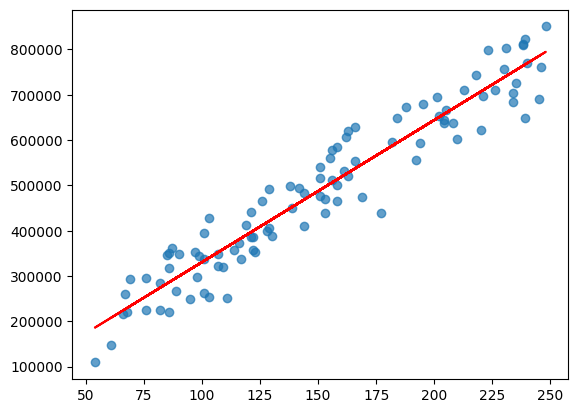

In [9]:
plt.scatter(X, Y, alpha=0.7)
plt.plot(X, theta_0 + theta_1 * X, "r")
plt.show()

### MSE plot

In [10]:
x_mse = []
y_mse = []
for t in mse_record:
    x_mse.append(t[0])
    y_mse.append(t[1])

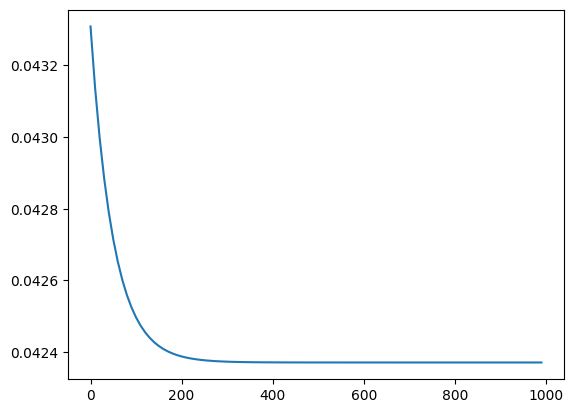

In [11]:
plt.plot(x_mse, y_mse)
plt.show()